In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import matplotlib.pyplot as plt
import modJoint as mj
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
mj??

# EXP 1: Does SB model improve performance as a f(sequence)

In [26]:
# SB model compare
S = pd.DataFrame()
gam_use, kap_use = 5.0,2.5
for gam_use in [2]:#np.arange(1,5.0):
    for s_trans in [0,1]:
        for u_trans in [0,1]:
            for iteration in range(30):
                this_M = mj.modJoint(gammaCB=gam_use,kappaCB= kap_use,stim_trans=s_trans,uniform_trans=u_trans)
                this_M.run_model(500)
                S_ = pd.Series({'StimTrans':s_trans,'ModelSB':u_trans==0,'KappaCB':kap_use,'GammaCB':gam_use,
                                'E':np.std(this_M.E),'Model':this_M})
                S = S.append(S_,ignore_index=1)
            
S['KappaCB'] = np.round(S['KappaCB'],1)


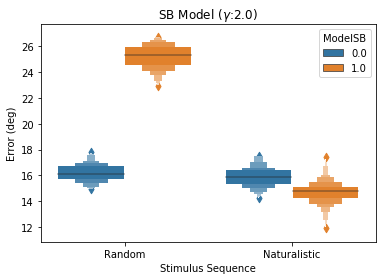

In [27]:
# sns.pointplot(data=S[S.StimTrans==0],x='GammaCB',y='E',hue='ModelSB')
# plt.title('SB model with Naturalistic data')
# plt.show()
gam_use = 2
sns.boxenplot(data=S[S.GammaCB==gam_use],x='StimTrans',y='E',hue='ModelSB')
plt.title('SB Model ($\gamma$:%.1f)' %gam_use)
plt.xlabel('Stimulus Sequence')
plt.ylabel('Error (deg)')
plt.xticks([0,1],['Random','Naturalistic'])
sav_name = '_figs/SB_model_wNatData.png'
plt.savefig(sav_name)
plt.show()
# sns.violinplot(data=S[S.KappaCB==4.2],x='StimTrans',y='E',hue='ModelSB')
# # sns.swarmplot(data=S[S.KappaCB==4.2],x='StimTrans',y='E',hue='ModelSB',dodge=1)
# plt.title('SB model ($\kappa$:4.2)')
# plt.show()
# plt.ylim([7,13])

In [19]:
gam_use, kap_use = 2.0,2.5
this_M = mj.modJoint(gammaCB=gam_use,kappaCB= kap_use,stim_trans=0,uniform_trans=0)
this_M.run_model(50000)

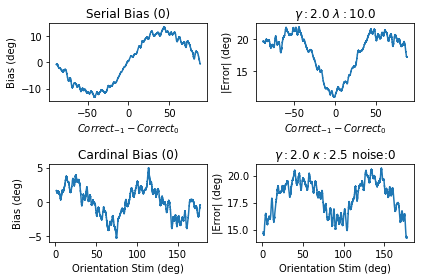

In [21]:
this_M.quick_view_results(1000)

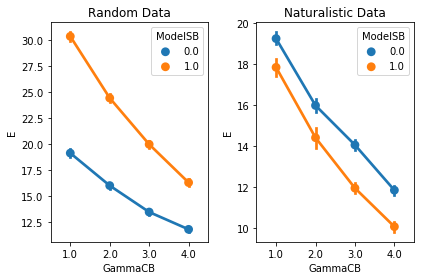

In [15]:
plt.subplot(121)
sns.pointplot(data=S[S.StimTrans==0],x='GammaCB',y='E',hue='ModelSB')
plt.title('Random Data')
plt.subplot(122)
sns.pointplot(data=S[S.StimTrans==1],x='GammaCB',y='E',hue='ModelSB')
plt.title('Naturalistic Data')
plt.tight_layout()
plt.show()

# EXP 2: Does CB model improve performance as a f(sequence)

In [105]:
# CB model compare
C = pd.DataFrame()
gam_use, kap_use = 0.8,3.0
for kap_use in np.arange(1.4,4.4,.4):
    for s_prior in [0,1]:
        for u_tuning in [0,1]:
            for iteration in range(30):
                this_M = mj.modJoint(gammaCB=gam_use,kappaCB= kap_use,stim_prior=s_prior,uniform_tuning=u_tuning)
                this_M.run_model(500)
                S_ = pd.Series({'stimPrior':s_prior,'ModelCB':u_tuning==0,'KappaCB':kap_use,'GammaCB':gam_use,
                                'E':np.std(this_M.E),'Model':this_M})
                C = C.append(S_,ignore_index=1)
            
C['KappaCB'] = np.round(C['KappaCB'],1)
            

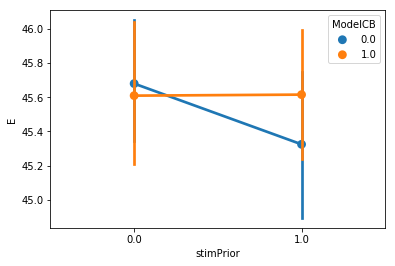

In [113]:
# sns.pointplot(data=C,x='KappaCB',y='E',hue='ModelCB')
sns.pointplot(data=C[C.KappaCB==1.8],x='stimPrior',y='E',hue='ModelCB')

# Question: what does kappa really do, should we just be changing gamma?

In [1]:
# CB model compare
C2 = pd.DataFrame()
gam_use, kap_use = 3.0,5
for gam_use in np.arange(2,6):
    for s_prior in [0,1]:
        for u_tuning in [0,1]:
            for iteration in range(1):
                this_M = mj.modJoint(gammaCB=gam_use,kappaCB= kap_use,stim_prior=s_prior,uniform_tuning=u_tuning)
                this_M.run_model(50000)
                S_ = pd.Series({'stimPrior':s_prior,'ModelCB':u_tuning==0,'KappaCB':kap_use,'GammaCB':gam_use,
                                'E':np.std(this_M.E),'Model':this_M})
                C2 = C2.append(S_,ignore_index=1)
            
C2['KappaCB'] = np.round(C2['KappaCB'],1)
C2['GammaCB'] = np.round(C2['GammaCB'],1)

NameError: name 'pd' is not defined

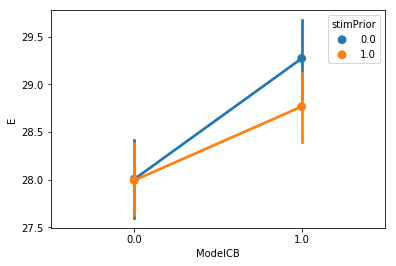

In [125]:
sns.pointplot(x='ModelCB',y='E',hue='stimPrior',data=C2[C2.GammaCB==0.2])

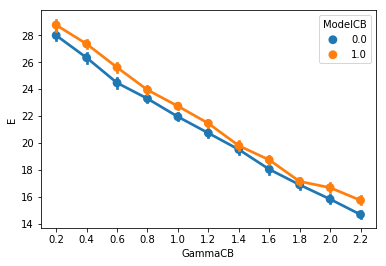

In [130]:
sns.pointplot(x='GammaCB',y='E',data=C2[C2.stimPrior==1],hue='ModelCB')

# Can we do CB by just multipying by prior?

In [169]:
this_M = mj.modJoint(gammaCB=0.5,kappaCB=3.0,uniform_tuning=1)
this_M.run_model(50000)

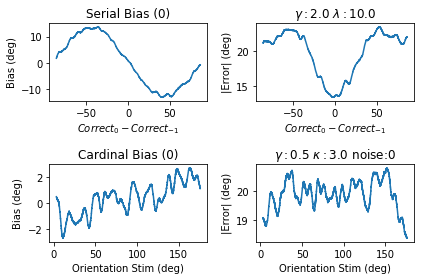

In [170]:
this_M.quick_view_results(2000)

In [167]:
this_M2 = mj.modJoint(gammaCB=0.5,kappaCB=3.0,uniform_tuning=0)
this_M2.run_model(50000)

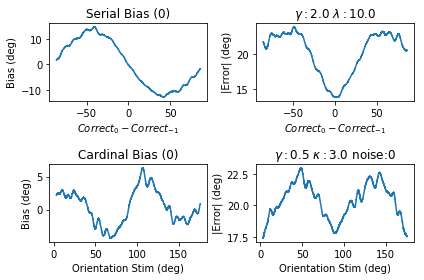

In [168]:
this_M2.quick_view_results(2000)

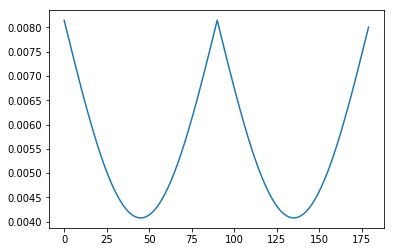

In [172]:
# from this_M, grab stimuli and multiply by prior! 
# this_M.stim
plt.plot(this_M.p_theta)

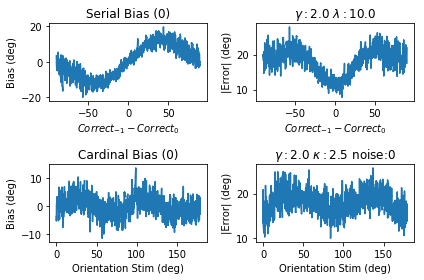

In [86]:
model_ = mj.modJoint(gammaCB=2,kappaCB=2.5,uniform_tuning=0,VERBOSE=0)
model_.run_model(50000)
model_.quick_view_results(100)
L = model_.get_stimulus_likelihood() #NB slower part, would be good to get numpy more involved

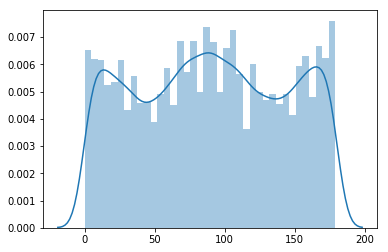

In [93]:
sns.distplot(model_.stimHat)
plt.show()

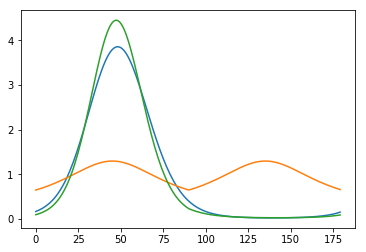

In [85]:
L.shape # trials left x 180
i = 5
# prior = model_.p_theta
prior = 1/model_.p_theta
prior/=np.sum(prior)
this_L = L[i,:]
this_L/=np.sum(this_L)
post = prior*this_L
post/=np.sum(post)

plt.plot(this_L*180)
plt.plot(prior*180)
plt.plot(post*180)
plt.show()

In [79]:
nL = L * prior
decL = np.argmax(L,1)
decnL = np.argmax(nL,1)


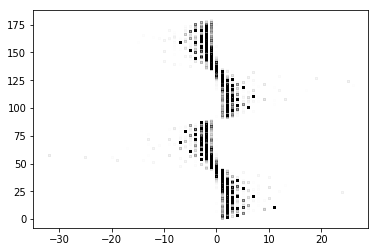

In [80]:
# plt.plot(decL,decnL,'k.',alpha=.01)
# plt.hist(decnL,60)
# plt.show()
tmp = model_.angle(decnL,decL)
plt.plot(tmp,decnL,'k.',alpha=.005)


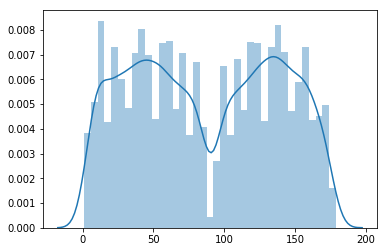

In [84]:
sns.distplot(decnL)
plt.show()

In [ ]:
# lets experiment with different orders of applying CB AND SBf